In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import datasets, metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = StandardScaler()
X_std_iris = scaler.fit_transform(X_iris)

#siluet katsayıları

for i in range(2,5):
    
    siluet_k_means = KMeans(n_clusters=i,random_state=123).fit_predict(X_std_iris)
    print("n_clusters={} için siluet katsayısı {:.3f}".format(i,metrics.silhouette_score(X_std_iris, siluet_k_means,
                                                                                         metric='euclidean')))


n_clusters=2 için siluet katsayısı 0.582
n_clusters=3 için siluet katsayısı 0.460
n_clusters=4 için siluet katsayısı 0.388


In [3]:
#Siluet değeri, bir nesnenin diğer kümelere ( ayrılma ) kıyasla kendi kümesine ( uyum ) ne kadar benzediğinin bir ölçüsüdür . 
#Siluet değeri [1, -1] arasında değişir; burada yüksek bir değer, nesnenin kendi kümesiyle iyi eşleştiğini ve 
#komşu kümelerle kötü eşleştiğini gösterir.En yüksek siluet değeri n_clusters=2 için hesaplanan değerdir.
#Aynı zamanda bizim için de en iyi modeldir.

In [4]:
#heart.csv veri seti için:

In [5]:
df_heart = pd.read_csv("heart.csv")
df_heart.head()
df_heart = df_heart.iloc[0:300]
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df_heart.iloc[:, :13]
y = df_heart.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [7]:
#Standardizasyon

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#pca

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

#train_test_split

X_yari1,X_yari2,X_pcayari1,X_pcayari2 = train_test_split(X_std,X_pca,test_size=0.5,random_state=123)

In [8]:
# Özellikleri ve tahmin edilen kümeler için dataframe
ytahmin = pd.DataFrame()

for counter, data in enumerate([
    (X_yari1, X_pcayari1),
    (X_yari2, X_pcayari2)]):
    
    
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

In [9]:
ytahmin.head()

,pca_f1_sample0,pca_f2_sample0,clust2_sample0,clust3_sample0,clust4_sample0,pca_f1_sample1,pca_f2_sample1,clust2_sample1,clust3_sample1,clust4_sample1
0,0.502394,-0.374089,1,1,3,2.814811,-1.650930,1,1,1
1,-0.275178,-1.702055,0,2,0,-1.449923,-0.124340,0,0,3
2,0.956146,-2.410081,1,1,1,3.454062,0.815627,1,1,1
3,2.812827,-0.876454,1,1,1,-0.278055,2.850483,0,2,2
4,1.468624,-0.534581,1,1,1,0.417451,0.823032,0,2,2


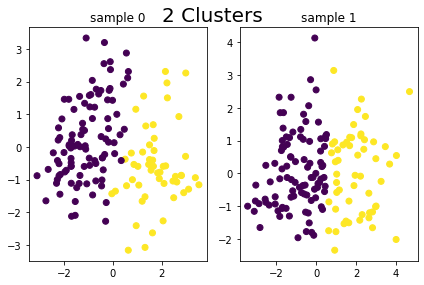

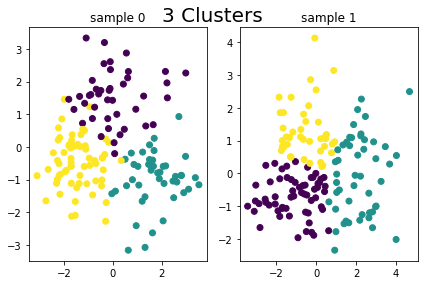

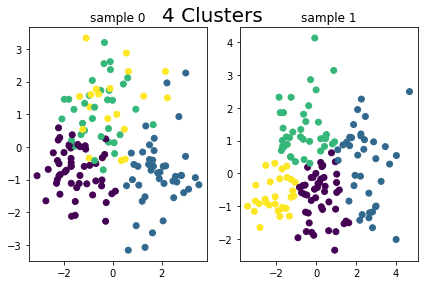

In [10]:
#sonucları görselleştirelim:

for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [11]:
#Sadece ilk alt örnekte küme merkezi ve küme şekli açısından tutarlı sonuçlar verdi.

In [12]:
y_pred = KMeans(n_clusters=2,random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y,y_pred)

0.3902919454328411

In [13]:
for i in range(2,5):
    y_pred = KMeans(n_clusters=i,random_state=123).fit_predict(X_std)
    metrics.adjusted_rand_score(y,y_pred)
    print("n_clusters={} için ARI:{:.3f}".format(i,metrics.adjusted_rand_score(y,y_pred)))

n_clusters=2 için ARI:0.390
n_clusters=3 için ARI:0.273
n_clusters=4 için ARI:0.187


In [14]:
#ARI değerleri de incelendiğinde en basarılı 2li küme sayısına sahip olan modeldir.

In [15]:
etiketler = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.16638513153435705


In [16]:
for i in range(2,5):
    etiketler = KMeans(n_clusters=i, random_state=123).fit_predict(X_std)
    print("n_clusters={} için siluet katsayısı {:.3f}".format(i,metrics.silhouette_score(X_std, etiketler, metric='euclidean')))

n_clusters=2 için siluet katsayısı 0.168
n_clusters=3 için siluet katsayısı 0.166
n_clusters=4 için siluet katsayısı 0.124


In [17]:
#en yüksek siluet değeri n_clusters=2 için döndü.Görselde de göründüğü gibi en iyi model 2 li küme modelidir.